In [5]:
# Save cleaned data
# data.to_csv("data/cleaned_data.csv")

In [109]:
#Importing importing important tools into Testing algorithms
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


In [110]:
#Importing cleaned data
rain_data = pd.read_csv('data/cleaned_data.csv')
rain_data = rain_data.drop(columns=["Unnamed: 0"])
columns = rain_data.columns
print(columns)
rain_data.describe()

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM',
       'RainTomorrow'],
      dtype='object')


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.187465,23.255262,1.525219,39.334597,13.703431,18.417878,69.042847,51.470804,1007.844990,1005.502278,16.996167,21.700364,1.525971
std,6.384928,7.027216,3.876616,12.238749,8.274286,8.313622,18.613032,20.576062,30.632245,30.462330,6.440035,6.774798,3.899425
min,-7.000000,1.900000,0.000000,6.000000,0.000000,0.000000,12.000000,0.000000,901.388200,897.473200,-2.400000,0.900000,0.000000
25%,7.600000,18.000000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1011.100000,1008.600000,12.300000,16.700000,0.000000
50%,12.000000,22.700000,0.000000,37.000000,13.000000,18.005600,70.000000,51.786600,1016.700000,1014.300000,16.800000,21.276800,0.000000
75%,16.800000,28.200000,0.800000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,21.500000,26.300000,0.800000
max,31.200000,44.500000,27.600000,80.000000,39.000000,44.000000,100.000000,100.000000,1038.900000,1036.300000,36.400000,42.400000,27.600000


In [111]:
#Replacing all values of Yes and No to 1,0 respectively
rain_data = rain_data.replace(to_replace = "Yes", value = 1)
rain_data = rain_data.replace(to_replace = "No", value = 0)

In [112]:
#Identifying each unique Location
rain_data['Location'].unique()

array(['Albury', 'Badgerys Creek', 'Cobar', 'Coffs Harbour', 'Moree',
       'Newcastle', 'Norah Head', 'Norfolk Island', 'Penrith', 'Richmond',
       'Sydney', 'Sydney Airport', 'Wagga Wagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'Mount Ginini',
       'Ballarat', 'Bendigo', 'Sale', 'Melbourne Airport', 'Melbourne',
       'Mildura', 'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane',
       'Cairns', 'Gold Coast', 'Townsville', 'Adelaide', 'Mount Gambier',
       'Nuriootpa', 'Woomera', 'Albany', 'Witchcliffe', 'Pearce RA AF',
       'Perth Airport', 'Perth', 'Salmon Gums', 'Walpole', 'Hobart',
       'Launceston', 'Alice Springs', 'Darwin', 'Katherine', 'Uluru'],
      dtype=object)

In [113]:
#ensuring that no unidenfied locations passsed thorugh
rain_data = rain_data[(rain_data['Location'] != 'undefined')]
rain_data['Location'].unique()

array(['Albury', 'Badgerys Creek', 'Cobar', 'Coffs Harbour', 'Moree',
       'Newcastle', 'Norah Head', 'Norfolk Island', 'Penrith', 'Richmond',
       'Sydney', 'Sydney Airport', 'Wagga Wagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'Mount Ginini',
       'Ballarat', 'Bendigo', 'Sale', 'Melbourne Airport', 'Melbourne',
       'Mildura', 'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane',
       'Cairns', 'Gold Coast', 'Townsville', 'Adelaide', 'Mount Gambier',
       'Nuriootpa', 'Woomera', 'Albany', 'Witchcliffe', 'Pearce RA AF',
       'Perth Airport', 'Perth', 'Salmon Gums', 'Walpole', 'Hobart',
       'Launceston', 'Alice Springs', 'Darwin', 'Katherine', 'Uluru'],
      dtype=object)

In [134]:
#To ensure all values of Yes and No have been replaced with 1 and 0 respectively
rain_data['RainTomorrow'].unique()

array([0, 1], dtype=int64)

In [135]:
group_by_raintomorrow = rain_data.groupby(by='RainTomorrow')
group_by_raintomorrow.mean()


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM
RainTomorrow,,,,,,,,,,,,,,
0,11.898766,23.842600,0.961004,37.914263,13.344864,18.075821,66.477865,46.534620,1008.694745,1006.308125,17.080922,22.390893,0.152816,0.075254
1,13.186558,21.222677,3.477786,44.249915,14.944313,19.601625,77.919422,68.553343,1004.904261,1002.713500,16.702857,19.310663,0.479123,6.546433


In [136]:
#Setting up data to be arranged in terms of location with all values averaged
group_by_Location = rain_data.groupby(by=['Location'])
rain_data_avg = group_by_Location.mean()
rain_data_count = group_by_Location.count()

In [137]:
#Grouping each Location to gain an average of all results/check if there are any inconsistencies
group_by_Location.mean()


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Location,,,,,,,,,,,,,,,
Adelaide,12.614677,22.917236,1.385938,36.475772,9.960795,15.474691,59.940497,44.824331,1018.514942,1016.576839,16.919851,21.561307,0.229450,1.363926,0.222654
Albany,12.932847,20.103847,2.020010,37.160482,11.742818,18.527425,74.723983,63.635150,1017.541312,1015.762028,16.240942,19.046145,0.299735,2.031358,0.299072
Albury,9.526689,22.624083,1.420309,32.732609,8.228694,14.349624,74.099998,47.900990,1018.407368,1015.642926,14.351996,21.355695,0.205247,1.413665,0.205247
Alice Springs,13.124786,29.227991,0.594045,40.289525,14.718904,18.070876,43.657295,24.118168,1016.667228,1012.789125,21.267663,27.962473,0.080172,0.596666,0.080501
Badgerys Creek,11.142001,23.998792,1.416830,33.447137,8.069238,14.028463,76.824257,51.427160,1013.509991,1010.568658,16.568719,22.484531,0.199795,1.412008,0.199112
Ballarat,7.356812,18.276441,1.429865,44.307828,19.399713,22.256658,81.750579,59.048690,1017.172168,1015.543279,11.684799,16.774880,0.257596,1.428842,0.257926
Bendigo,8.592164,21.609992,1.275815,38.704748,12.913700,17.129135,70.561166,46.472433,1017.612741,1015.612845,13.846768,20.242865,0.185564,1.274060,0.185234
Brisbane,16.402520,26.437683,1.564928,28.219993,6.950965,11.005625,64.016628,53.857299,1018.246947,1015.056429,21.826067,24.731856,0.223980,1.566207,0.224296
Cairns,21.196093,29.544344,2.131366,38.034831,15.907632,21.877893,69.902276,61.677376,1014.169748,1011.118613,25.799465,27.896653,0.319946,2.138287,0.317938


In [138]:
#Count check to make sure there was consistent values in each area
group_by_Location.count()

,Date,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Location,,,,,,,,,,,,,,,,,,,
Adelaide,3090,3090,3090,3090,3090,3090,3090,3090,3090,3090,3090,3090,3090,3090,3090,3090,3090,3090,3090
Albany,3016,3016,3016,3016,3016,3016,3016,3016,3016,3016,3016,3016,3016,3016,3016,3016,3016,3016,3016
Albury,3011,3011,3011,3011,3011,3011,3011,3011,3011,3011,3011,3011,3011,3011,3011,3011,3011,3011,3011
Alice Springs,3031,3031,3031,3031,3031,3031,3031,3031,3031,3031,3031,3031,3031,3031,3031,3031,3031,3031,3031
Badgerys Creek,2928,2928,2928,2928,2928,2928,2928,2928,2928,2928,2928,2928,2928,2928,2928,2928,2928,2928,2928
Ballarat,3028,3028,3028,3028,3028,3028,3028,3028,3028,3028,3028,3028,3028,3028,3028,3028,3028,3028,3028
Bendigo,3034,3034,3034,3034,3034,3034,3034,3034,3034,3034,3034,3034,3034,3034,3034,3034,3034,3034,3034
Brisbane,3161,3161,3161,3161,3161,3161,3161,3161,3161,3161,3161,3161,3161,3161,3161,3161,3161,3161,3161
Cairns,2988,2988,2988,2988,2988,2988,2988,2988,2988,2988,2988,2988,2988,2988,2988,2988,2988,2988,2988


In [139]:
#Checking the first 15 values to ensure right average set was grabbed
df = group_by_Location.mean()
df.head(15)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Location,,,,,,,,,,,,,,,
Adelaide,12.614677,22.917236,1.385938,36.475772,9.960795,15.474691,59.940497,44.824331,1018.514942,1016.576839,16.919851,21.561307,0.229450,1.363926,0.222654
Albany,12.932847,20.103847,2.020010,37.160482,11.742818,18.527425,74.723983,63.635150,1017.541312,1015.762028,16.240942,19.046145,0.299735,2.031358,0.299072
Albury,9.526689,22.624083,1.420309,32.732609,8.228694,14.349624,74.099998,47.900990,1018.407368,1015.642926,14.351996,21.355695,0.205247,1.413665,0.205247
Alice Springs,13.124786,29.227991,0.594045,40.289525,14.718904,18.070876,43.657295,24.118168,1016.667228,1012.789125,21.267663,27.962473,0.080172,0.596666,0.080501
Badgerys Creek,11.142001,23.998792,1.416830,33.447137,8.069238,14.028463,76.824257,51.427160,1013.509991,1010.568658,16.568719,22.484531,0.199795,1.412008,0.199112
Ballarat,7.356812,18.276441,1.429865,44.307828,19.399713,22.256658,81.750579,59.048690,1017.172168,1015.543279,11.684799,16.774880,0.257596,1.428842,0.257926
Bendigo,8.592164,21.609992,1.275815,38.704748,12.913700,17.129135,70.561166,46.472433,1017.612741,1015.612845,13.846768,20.242865,0.185564,1.274060,0.185234
Brisbane,16.402520,26.437683,1.564928,28.219993,6.950965,11.005625,64.016628,53.857299,1018.246947,1015.056429,21.826067,24.731856,0.223980,1.566207,0.224296
Cairns,21.196093,29.544344,2.131366,38.034831,15.907632,21.877893,69.902276,61.677376,1014.169748,1011.118613,25.799465,27.896653,0.319946,2.138287,0.317938


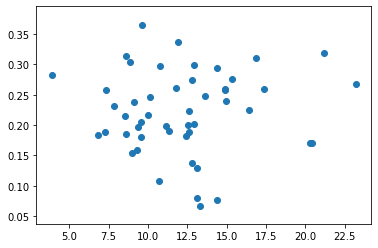

In [140]:
#Graph of Min Temp vs Rainfall
plt.scatter(df['MinTemp'],df['RainTomorrow'])

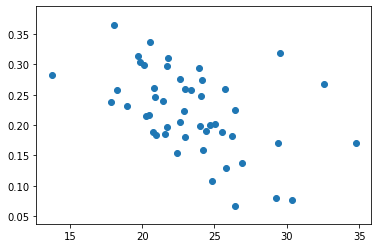

In [141]:
#Graph of Max Temp vs Rainfall
plt.scatter(df['MaxTemp'],df['RainTomorrow'])

In [142]:
x = df[['MinTemp','MaxTemp']]
y = df['RainTomorrow']

In [143]:
x

,MinTemp,MaxTemp
Location,,
Adelaide,12.614677,22.917236
Albany,12.932847,20.103847
Albury,9.526689,22.624083
Alice Springs,13.124786,29.227991
Badgerys Creek,11.142001,23.998792
Ballarat,7.356812,18.276441
Bendigo,8.592164,21.609992
Brisbane,16.402520,26.437683
Cairns,21.196093,29.544344


In [144]:
#now to train and test the dataset
from sklearn.model_selection import train_test_split

In [145]:
#Setting Training set as 80% and Test set as 20%
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 10)

In [146]:
#80% of X values
len(x_train)

39

In [147]:
x_train

,MinTemp,MaxTemp
Location,,
Sydney Airport,14.893432,23.371190
Albury,9.526689,22.624083
Townsville,20.405655,29.362974
Perth Airport,12.580359,25.533234
Cobar,13.118744,25.795556
Moree,12.785653,26.869991
Sale,8.562459,20.271859
Norfolk Island,16.838347,21.792746
Melbourne,11.788728,20.841975


In [148]:
len(x_test)

10

In [149]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [150]:
clf.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [151]:
#Predicting X values in calling the method and seeing best fit
clf.predict(x_test)

array([0.27534638, 0.27641548, 0.27447941, 0.11916604, 0.23238006,
       0.16968614, 0.12098322, 0.20222095, 0.23210983, 0.19779352])

In [152]:
y_test

Location
Sydney           0.259215
Mount Ginini     0.281734
Walpole          0.336644
Uluru            0.076266
Witchcliffe      0.297764
Mildura          0.108746
Alice Springs    0.080501
Penrith          0.200742
Brisbane         0.224296
Bendigo          0.185234
Name: RainTomorrow, dtype: float64

In [153]:
# Comparing y predict values against y test values
# Find the accuracy score
clf.score(x_test,y_test)

0.7939420828796351

In [105]:
#Accuracy is 79%